## 1

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
print(df.head(10))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

## 2

In [2]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of classes: {len(df['target'].unique())}")

Number of samples: 178
Number of features: 13
Number of classes: 3


In [22]:
df['target'].unique()

array([0, 1, 2])

## 3

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

## 4

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5

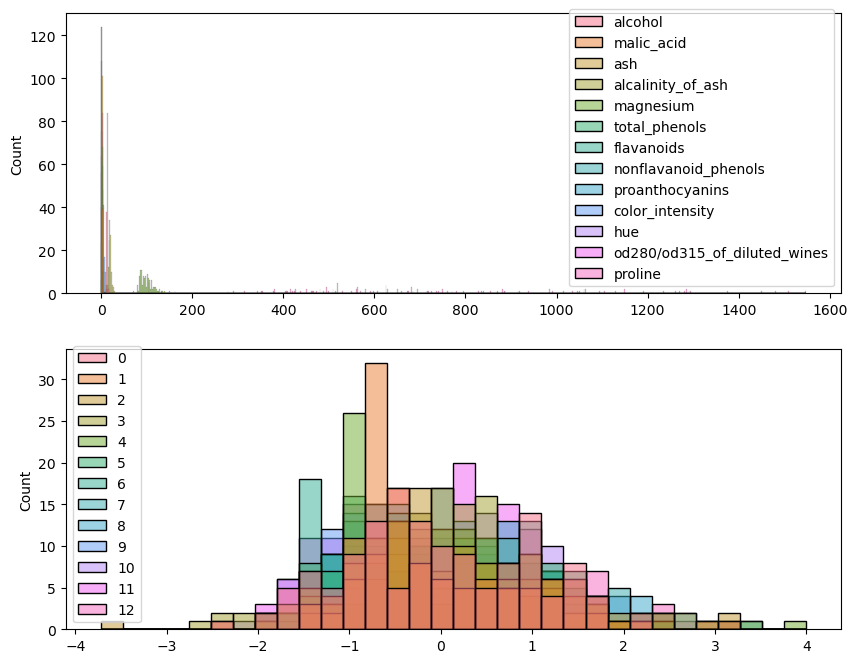

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(X_train, ax=axes[0])
sns.histplot(X_train_scaled, ax=axes[1])
plt.show()

## 6

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

## 7

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_split': 2}


## 8

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = grid_search.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy: 0.9629629629629629
Precision: 0.966183574879227
Recall: 0.9629629629629629
F1-Score: 0.9632115280263428


## 9

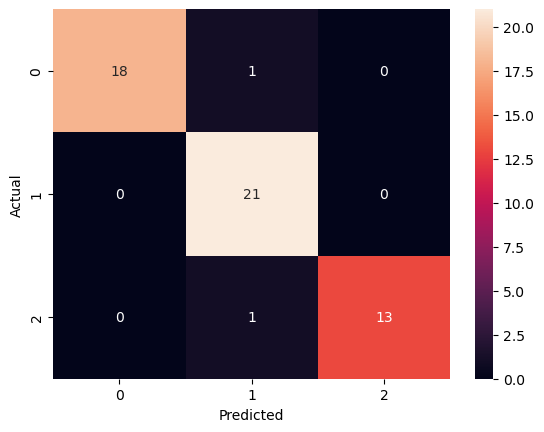

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Q2

In [12]:
import numpy as np

In [20]:
def string_with_most_vowels(arr):
    vowels= set('aeiou')
    
    max_vowel_count=-1
    result=""
    for s in arr:
        count=len(set(s.lower and vowels))
        
        if(count> max_vowel_count or (count==max_vowel_count and s<result)):
            result=s
        
    return result

In [21]:
arr=np.array(["hi","this","is","an","array"])
result=string_with_most_vowels(arr)
print(result)

array
